In [1]:
import os
import shutil
import re
import matplotlib.pyplot as plt
import csv
import pandas as pd

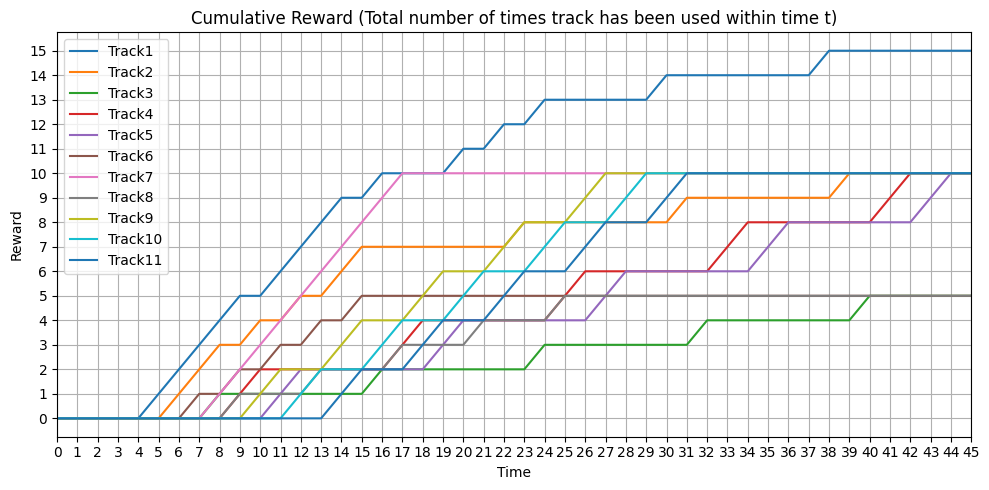

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
from natsort import natsorted


files = [f for f in os.listdir('.') if f.endswith('_c.txt')]
plot_data = []
for file in files:
    base_name = os.path.splitext(file)[0]
    parts = base_name.split('_')

    if len(parts) < 2:
        continue

    legend = parts[-2]
    title = parts[-1]

    try:
        df = pd.read_csv(file)
        time = df.iloc[:, 0]
        reward = df.iloc[:, 1]
        plot_data.append((legend, time, reward))
    except Exception as e:
        print(f"Failed to read or parse {file}: {e}")


plot_data = natsorted(plot_data, key=lambda x: x[0])

plt.figure(figsize=(10, 5))

for legend, time, reward in plot_data:
    plt.plot(time, reward, label=legend)

plt.xlabel("Time")
plt.ylabel("Reward")
plt.title("Cumulative Reward (Total number of times track has been used within time t)")
plt.legend()
plt.grid(True)


ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(left=0)
plt.xlim(right=45)

plt.tight_layout()
plt.show()


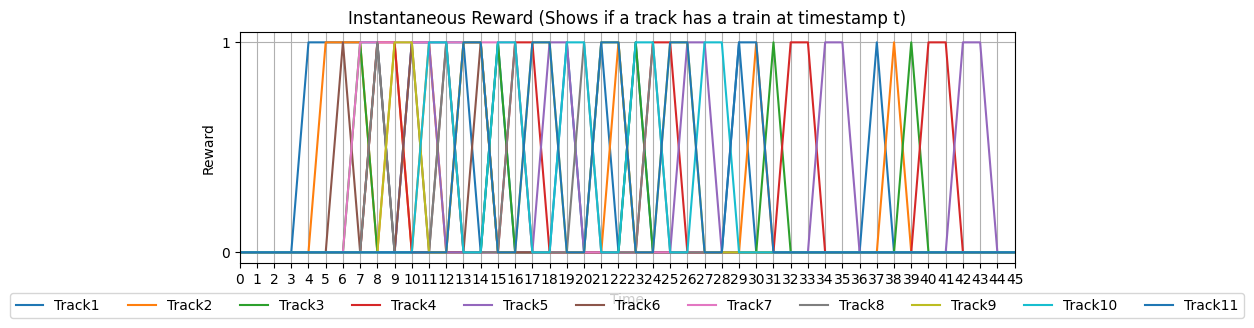

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
from natsort import natsorted

files = [f for f in os.listdir('.') if f.endswith('_i.txt')]

plot_data = []

for file in files:
    base_name = os.path.splitext(file)[0]
    parts = base_name.split('_')

    if len(parts) < 2:
        continue

    legend = parts[-2]
    title = parts[-1]

    try:
        df = pd.read_csv(file)
        time = df.iloc[:, 0]
        reward = df.iloc[:, 1]
        plot_data.append((legend, time, reward))
    except Exception as e:
        print(f"Failed to read or parse {file}: {e}")

plot_data = natsorted(plot_data, key=lambda x: x[0])
plt.figure(figsize=(10, 3))
for legend, time, reward in plot_data:
    plt.plot(time, reward, label=legend)

plt.xlabel("Time")
plt.ylabel("Reward")
plt.title("Instantaneous Reward (Shows if a track has a train at timestamp t)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(plot_data))
plt.grid(True)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(left=0)
plt.xlim(right=45)
# plt.tight_layout()
plt.show()

/var/folders/sk/j3tbx29s2qb75wczcww53gw80000gp/T/ipykernel_58587/3335173206.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', n_files)


45 100.0
45 95.0
45 90.0
45 85.0
45 80.0
45 90.0
45 85.0
45 95.0
45 90.0
45 85.0
45 80.0
Plot saved as 'Charge_of_Trains_on_each_Track_with_time.png'


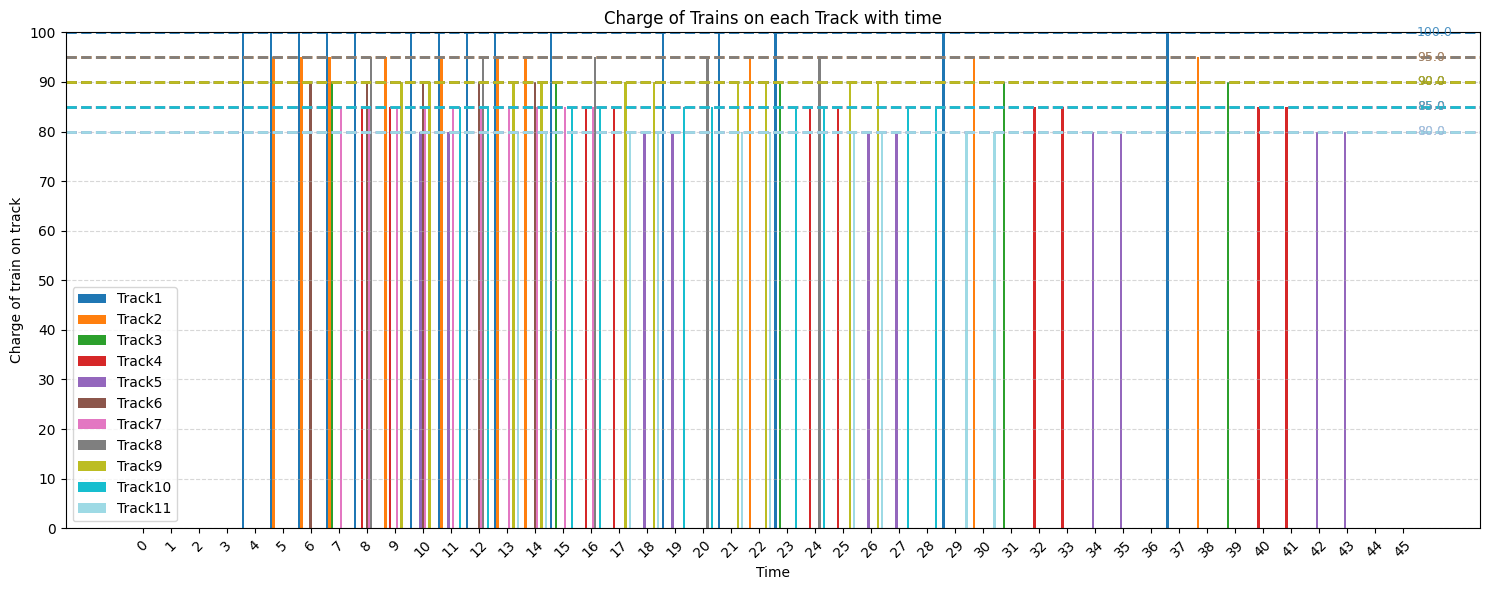

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from natsort import natsorted

xlim = None              
ylim = None              
legend_loc = 'upper right'  
save_plot = True         

files = [f for f in os.listdir() if f.endswith('.txt')]

data_dict = {}
x_values = None

for file in files:
    df = pd.read_csv(file)
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]
    if x_values is None:
        x_values = x
    else:
        assert all(x_values == x), f"X values differ in {file}"
    label = 'Track' + os.path.splitext(file)[0].split('_')[-1]
    data_dict[label] = y.values

sorted_labels = natsorted(data_dict.keys())

data_df = pd.DataFrame({label: data_dict[label] for label in sorted_labels}, index=x_values)
data_df.index.name = "Time"
plot_title = "Charge of Trains on each Track with time"
plt.figure(figsize=(15, 6))
n_files = len(data_df.columns)
bar_width = 0.9 / n_files
x_indices = np.arange(len(data_df.index))
colors = plt.cm.get_cmap('tab20', n_files)
for i, label in enumerate(data_df.columns):
    offset = (i - n_files / 2) * bar_width + bar_width / 2
    color = colors(i)
    plt.bar(x_indices + offset, data_df[label], width=bar_width, color=color, label=label)
    non_zero_values = data_df[label][data_df[label] != 0]
    if not non_zero_values.empty:
        mean_value = np.mean(non_zero_values)
        print(x_indices[-1],mean_value)
        plt.axhline(y=mean_value, color=color, linestyle='--', linewidth=2, label=None)
        plt.text(x_indices[-1] + 0.5, mean_value, f"{mean_value:.1f}", color=color,
                 fontsize=9, va='center', ha='left', alpha=0.8)
plt.xticks(x_indices, data_df.index, rotation=45)
plt.xlabel("Time")
plt.ylabel("Charge of train on track")
plt.title(plot_title)
plt.legend(loc='lower left', fontsize=10)
if xlim:
    plt.xlim(xlim)
plt.ylim(top=100)

plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
if save_plot:
    # Create a safe filename from the title
    filename = plot_title.replace(" ", "_") + ".png"
    plt.savefig(filename, dpi=300)
    print(f"Plot saved as '{filename}'")
plt.show()

/var/folders/sk/j3tbx29s2qb75wczcww53gw80000gp/T/ipykernel_46902/2211907701.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', n_files)


95.71428571428571
95.71428571428571
95.71428571428571
95.71428571428571
95.71428571428571
100.0
100.0
100.0
100.0
100.0
99.375
99.375
99.375
99.375
99.375


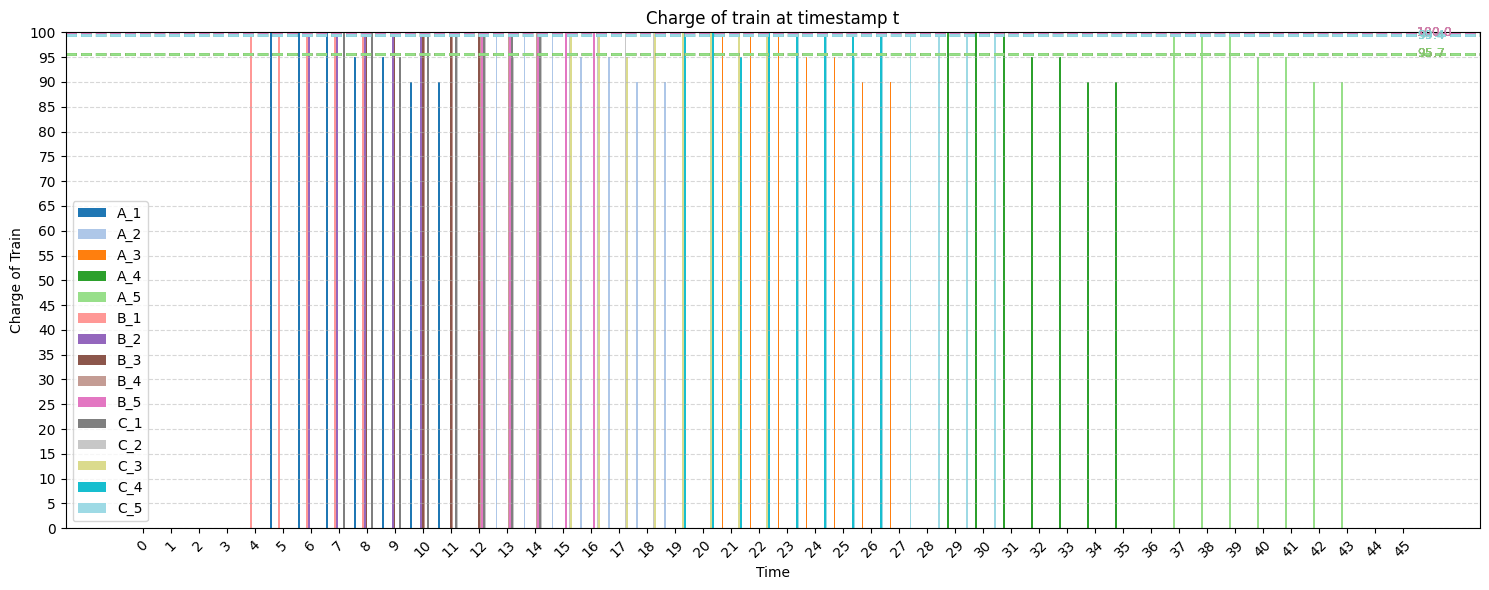

<Figure size 640x480 with 0 Axes>

In [41]:
# === Configuration ===
xlim = None
ylim = None
legend_loc = 'upper right'
plot_title = "Charge of train at timestamp t"
# ======================

# Get all .txt files in the current directory
files = [f for f in os.listdir() if f.endswith('.txt')]

data_dict = {}
x_values = None
label_lookup = {}

# Load data and prepare labels
for file in files:
    df = pd.read_csv(file)
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]

    if x_values is None:
        x_values = x
    else:
        assert all(x_values == x), f"X values differ in {file}"

    filename = os.path.splitext(file)[0]
    parts = filename.split('_')
    label = '_'.join(parts[-2:])  # last two parts of filename
    label_lookup[label] = y.values

# Natural sort of labels
sorted_labels = natsorted(label_lookup.keys())

# Create DataFrame with sorted labels
data_df = pd.DataFrame({label: label_lookup[label] for label in sorted_labels}, index=x_values)
data_df.index.name = "Time"

# Plotting
plt.figure(figsize=(15, 6))
n_files = len(data_df.columns)
bar_width = 0.9 / n_files  # Thicker bars
x_indices = np.arange(len(data_df.index))
colors = plt.cm.get_cmap('tab20', n_files)

from matplotlib.ticker import MultipleLocator

for i, label in enumerate(data_df.columns):
    offset = (i - n_files / 2) * bar_width + bar_width / 2
    color = colors(i)

    # Bars
    plt.bar(x_indices + offset, data_df[label], width=bar_width, color=color, label=label)

    # Mean line (only non-zero values)
    non_zero_values = data_df[label][data_df[label] != 0]
    if not non_zero_values.empty:
        mean_value = np.mean(non_zero_values)
        print(mean_value)
        plt.axhline(y=mean_value, color=color, linestyle='--', linewidth=2, label=None)
        
        # Annotate mean
        plt.text(x_indices[-1] + 0.5, mean_value, f"{mean_value:.1f}", color=color,
                 fontsize=9, va='center', ha='left', alpha=0.8)
  
# Axis labels and title
plt.xticks(x_indices, data_df.index, rotation=45)
plt.xlabel("Time")
plt.ylabel("Charge of Train")
plt.legend(loc='lower left')
plt.title(plot_title)

# Apply axis limits if set
if xlim:
    plt.xlim(xlim)
plt.ylim(top=100)

# Force integer y-axis ticks
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Legend inside plot
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().yaxis.set_major_locator(MultipleLocator(5))
plt.tight_layout()
plt.show()
plt.savefig('charge_tracking_trains', dpi=300)